In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Import dataset
df_original = pd.read_csv('Chicago_Crimes_2012_to_2017.csv.zip')

In [3]:
# Make a copy of the dataset and work on that.
df = df_original.copy()

In [4]:
df.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,3,10508693,HZ250496,05/03/2016 11:40:00 PM,013XX S SAWYER AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,...,24.0,29.0,08B,1154907.0,1893681.0,2016,05/10/2016 03:56:50 PM,41.864073,-87.706819,"(41.864073157, -87.706818608)"
1,89,10508695,HZ250409,05/03/2016 09:40:00 PM,061XX S DREXEL AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,...,20.0,42.0,08B,1183066.0,1864330.0,2016,05/10/2016 03:56:50 PM,41.782922,-87.604363,"(41.782921527, -87.60436317)"
2,197,10508697,HZ250503,05/03/2016 11:31:00 PM,053XX W CHICAGO AVE,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,...,37.0,25.0,24,1140789.0,1904819.0,2016,05/10/2016 03:56:50 PM,41.894908,-87.758372,"(41.894908283, -87.758371958)"
3,673,10508698,HZ250424,05/03/2016 10:10:00 PM,049XX W FULTON ST,0460,BATTERY,SIMPLE,SIDEWALK,False,...,28.0,25.0,08B,1143223.0,1901475.0,2016,05/10/2016 03:56:50 PM,41.885687,-87.749516,"(41.885686845, -87.749515983)"
4,911,10508699,HZ250455,05/03/2016 10:00:00 PM,003XX N LOTUS AVE,0820,THEFT,$500 AND UNDER,RESIDENCE,False,...,28.0,25.0,06,1139890.0,1901675.0,2016,05/10/2016 03:56:50 PM,41.886297,-87.761751,"(41.886297242, -87.761750709)"


In [5]:
df.columns

Index(['Unnamed: 0', 'ID', 'Case Number', 'Date', 'Block', 'IUCR',
       'Primary Type', 'Description', 'Location Description', 'Arrest',
       'Domestic', 'Beat', 'District', 'Ward', 'Community Area', 'FBI Code',
       'X Coordinate', 'Y Coordinate', 'Year', 'Updated On', 'Latitude',
       'Longitude', 'Location'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456714 entries, 0 to 1456713
Data columns (total 23 columns):
Unnamed: 0              1456714 non-null int64
ID                      1456714 non-null int64
Case Number             1456713 non-null object
Date                    1456714 non-null object
Block                   1456714 non-null object
IUCR                    1456714 non-null object
Primary Type            1456714 non-null object
Description             1456714 non-null object
Location Description    1455056 non-null object
Arrest                  1456714 non-null bool
Domestic                1456714 non-null bool
Beat                    1456714 non-null int64
District                1456713 non-null float64
Ward                    1456700 non-null float64
Community Area          1456674 non-null float64
FBI Code                1456714 non-null object
X Coordinate            1419631 non-null float64
Y Coordinate            1419631 non-null float64
Year                    1

In [9]:
# See which streets show up the most in the data set



In [10]:
# number of different streets
df['Block'].nunique()

32774

In [11]:
# where do crimes usually happen
df['Location Description'].nunique()

142

In [12]:
df['Location Description'].unique()

array(['APARTMENT', 'RESIDENCE', 'STREET', 'SIDEWALK',
       'CHA HALLWAY/STAIRWELL/ELEVATOR', 'RESIDENCE PORCH/HALLWAY',
       'VEHICLE NON-COMMERCIAL', 'OTHER', 'RESIDENCE-GARAGE',
       'VEHICLE-COMMERCIAL', 'PARKING LOT/GARAGE(NON.RESID.)',
       'SCHOOL, PUBLIC, GROUNDS', 'CHA PARKING LOT/GROUNDS',
       'MEDICAL/DENTAL OFFICE', 'RESTAURANT', 'SMALL RETAIL STORE',
       'CTA TRAIN', 'SCHOOL, PUBLIC, BUILDING',
       'HOSPITAL BUILDING/GROUNDS', 'DRUG STORE',
       'RESIDENTIAL YARD (FRONT/BACK)', 'GROCERY FOOD STORE', nan,
       'COLLEGE/UNIVERSITY GROUNDS', 'BANK', 'BAR OR TAVERN',
       'ATHLETIC CLUB', 'SPORTS ARENA/STADIUM', 'PARK PROPERTY',
       'NURSING HOME/RETIREMENT HOME', 'ATM (AUTOMATIC TELLER MACHINE)',
       'COMMERCIAL / BUSINESS OFFICE', 'ALLEY', 'VACANT LOT/LAND',
       'GAS STATION', 'POLICE FACILITY/VEH PARKING LOT', 'HOTEL/MOTEL',
       'LIBRARY', 'TAXICAB', 'SCHOOL, PRIVATE, GROUNDS',
       'HIGHWAY/EXPRESSWAY', 'CONVENIENCE STORE', 'TAVERN/LIQU

In [14]:
crime_loc_des = df.groupby(df['Location Description']).agg({'ID':'count'})

In [16]:
crime_loc_des = crime_loc_des.reset_index()

In [23]:
crime_loc_des = crime_loc_des.sort_values('ID',ascending=False)

In [27]:
top_15_crime_loc_des = crime_loc_des[:15]

In [28]:
top_15_crime_loc_des

,Location Description,ID
127,STREET,330471
111,RESIDENCE,233530
17,APARTMENT,185023
123,SIDEWALK,160891
98,OTHER,55774
103,PARKING LOT/GARAGE(NON.RESID.),41768
15,ALLEY,31771
114,RESIDENTIAL YARD (FRONT/BACK),30645
124,SMALL RETAIL STORE,28803
121,"SCHOOL, PUBLIC, BUILDING",25959


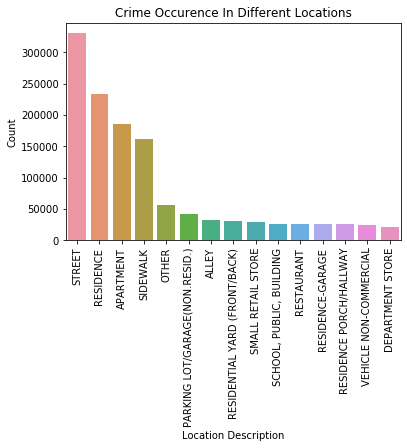

In [44]:
sns.barplot(x=top_15_crime_loc_des['Location Description'], y=top_15_crime_loc_des['ID']);
plt.xticks(rotation=90);
plt.ylabel('Count');
plt.title('Crime Occurence In Different Locations');